<a href="https://colab.research.google.com/github/gguex/ISH_ressources_cours_ML/blob/main/TP03c_corrige.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 3 : Corrigé

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Pour modifier la taille de sortie de graphiques dans le notebook
plt.rcParams['figure.figsize'] = [15, 8]
# Les modèles de régression
from sklearn.linear_model import LinearRegression, LogisticRegression
# Pour la CV
from sklearn.model_selection import train_test_split, GridSearchCV
# Nos score F1
from sklearn.metrics import f1_score
# Pour encoder les sorties en vecteurs one-hot
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# On charge le fichier de données
file_path = "drive/MyDrive/Colab Notebooks/ml_data/TP3/PimaIndiansDiabetes.csv"
data = pd.read_csv(file_path)
data

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [ ]:
# Les inputs sont toutes les données sauf "diabetes"
inputs = data.drop("diabetes", axis=1)
# Les sorties sont la variable "diabetes", qu'on transforme en variable binaire
outputs = (data["diabetes"].to_numpy() == "pos")*1
# On sépare en jeux d'entrainement/validation et test
inputs_train_val, inputs_test, outputs_train_val, outputs_test \
  = train_test_split(inputs, outputs, test_size=0.2, stratify=outputs)

In [ ]:
# On fait le modèle linéaire
linear_reg = LinearRegression()
linear_reg.fit(inputs_train_val, outputs_train_val)

LinearRegression()

In [ ]:
# On calcule les prédictions
outputs_lin_train = (linear_reg.predict(inputs_train_val) > 0.5)*1
outputs_lin_test = (linear_reg.predict(inputs_test) > 0.5)*1
# On calcule le F1 train et test
f1_lin_train = f1_score(outputs_train_val, outputs_lin_train)
f1_lin_test = f1_score(outputs_test, outputs_lin_test)

In [ ]:
# Paramètres pour la CV
params = np.linspace(0.001, 10, 100)
param_dict = {"C": params}
k = 10
# Modèle avec un peu plus d'itérations
logistic_reg = LogisticRegression(max_iter=10000)
# Recherche sur grille avec CV
grid_search = GridSearchCV(logistic_reg,
                            param_dict,
                            cv=k,
                            scoring="f1")
grid_search.fit(inputs_train_val, outputs_train_val)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.6...
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01])},
             scoring='f1')

[]

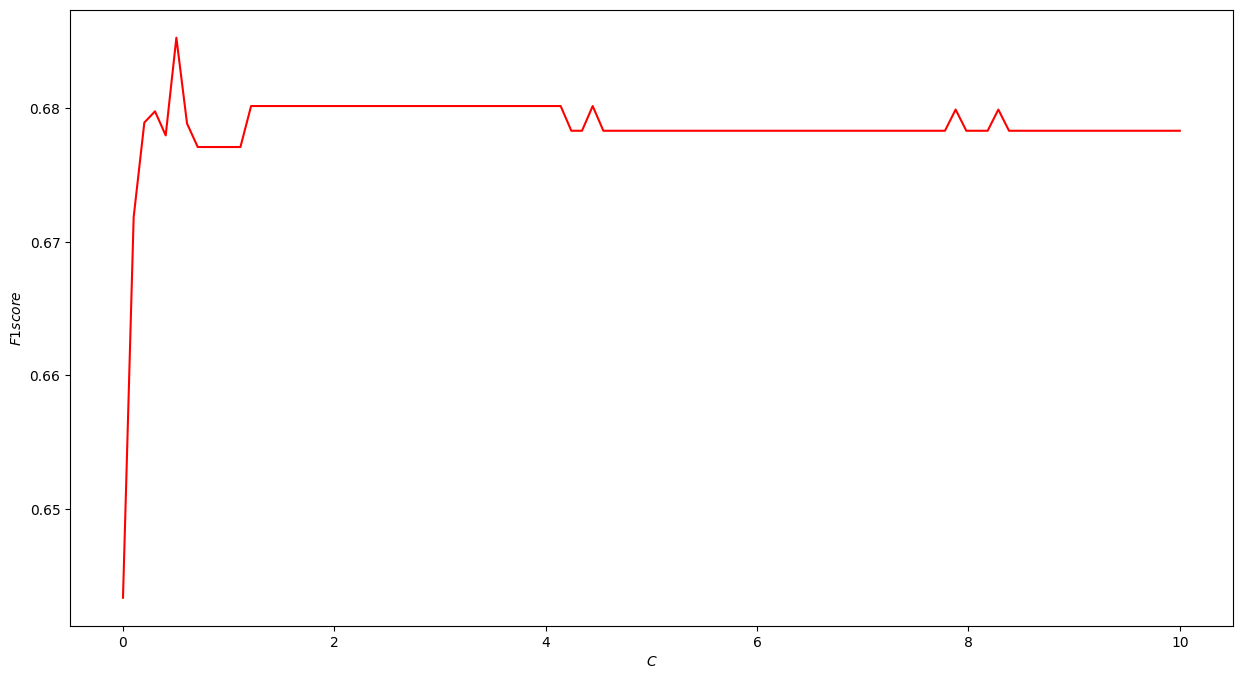

In [ ]:
# Plot des scores
f1_scores = grid_search.cv_results_["mean_test_score"]
# Plot des scores
fig, ax = plt.subplots()
ax.plot(params, f1_scores, c="red")
ax.set_xlabel("$C$")
ax.set_ylabel("$F1 score$")
plt.plot()

In [ ]:
# On sauve le meilleur modèle
best_C = grid_search.best_params_["C"]
best_log_reg = grid_search.best_estimator_
# Les prédictions
outputs_log_train = best_log_reg.predict(inputs_train_val)
outputs_log_test = best_log_reg.predict(inputs_test)
# Les scores f1
f1_log_train = f1_score(outputs_train_val, outputs_log_train)
f1_log_test = f1_score(outputs_test, outputs_log_test)

In [ ]:
print(f"Le F1 pour le modèle linéaire est de "
f"{f1_lin_train:.2%} (train) {f1_lin_test:.2%} (test)")
print(f"Le F1 pour le modèle logistique (C={best_C:.4f}) est "
f"de {f1_log_train:.2%} (train) {f1_log_test:.2%} (test)")

Le F1 pour le modèle linéaire est de 67.89% (train) 52.00% (test)
Le F1 pour le modèle logistique (C=0.5060) est de 68.38% (train) 54.00% (test)
